In [1]:
import requests

In [14]:
text = "заказчик не может найти нужный документ на странице тендеров, возникает ошибка при попытке скачать файл технического задания, система выдает сообщение о недоступности сервера, хотя другие разделы платформы работают корректно, коллеги из соседнего отдела тоже сталкиваются с этой проблемой, мы пробовали использовать разные браузеры и устройства, но результат одинаковый, техническая поддержка не отвечает на запросы уже второй день, а сроки подачи заявки истекают через три дня, подскажите, пожалуйста, как можно решить эту проблему или есть ли альтернативный способ получить необходимую документацию для участия в тендере, ситуация критическая и требует срочного вмешательства"
info = []
for i in range(1, len(text.split(" "))+1):
    info.append(' '.join(text.split(" ")[:i]))
info


['заказчик',
 'заказчик не',
 'заказчик не может',
 'заказчик не может найти',
 'заказчик не может найти нужный',
 'заказчик не может найти нужный документ',
 'заказчик не может найти нужный документ на',
 'заказчик не может найти нужный документ на странице',
 'заказчик не может найти нужный документ на странице тендеров,',
 'заказчик не может найти нужный документ на странице тендеров, возникает',
 'заказчик не может найти нужный документ на странице тендеров, возникает ошибка',
 'заказчик не может найти нужный документ на странице тендеров, возникает ошибка при',
 'заказчик не может найти нужный документ на странице тендеров, возникает ошибка при попытке',
 'заказчик не может найти нужный документ на странице тендеров, возникает ошибка при попытке скачать',
 'заказчик не может найти нужный документ на странице тендеров, возникает ошибка при попытке скачать файл',
 'заказчик не может найти нужный документ на странице тендеров, возникает ошибка при попытке скачать файл технического',


In [15]:
graph = []
for rsp in info:
    response = requests.get("http://localhost:7777/query?query="+rsp)
    graph.append([len(rsp.split(' ')), response.json()["execution_time"]])
print(graph)


[[1, 0.30225515365600586], [2, 0.2699100971221924], [3, 0.2838139533996582], [4, 0.2796509265899658], [5, 0.2931840419769287], [6, 0.30158185958862305], [7, 0.3097798824310303], [8, 0.316054105758667], [9, 0.4184887409210205], [10, 0.4877278804779053], [11, 0.6819126605987549], [12, 0.6650769710540771], [13, 0.6999759674072266], [14, 0.6489059925079346], [15, 0.6714093685150146], [16, 0.6432211399078369], [17, 0.6584930419921875], [18, 0.7197868824005127], [19, 0.6833364963531494], [20, 0.7160310745239258], [21, 0.7268600463867188], [22, 0.8261144161224365], [23, 1.05076265335083], [24, 1.0761022567749023], [25, 0.9291343688964844], [26, 0.9344379901885986], [27, 0.9392356872558594], [28, 0.9766702651977539], [29, 0.9899439811706543], [30, 1.0577528476715088], [31, 1.0384089946746826], [32, 1.1917831897735596], [33, 1.2510874271392822], [34, 1.3359270095825195], [35, 1.4217426776885986], [36, 1.371830701828003], [37, 1.4115042686462402], [38, 1.551879644393921], [39, 1.5335500240325928

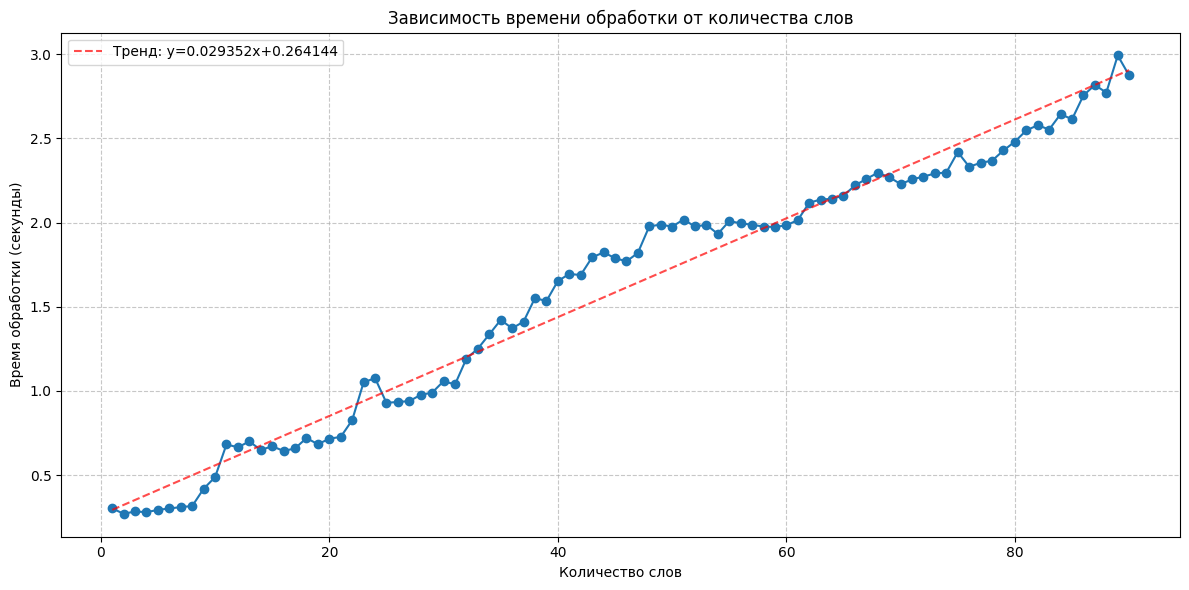

Минимальное время обработки: 0.2699 сек
Максимальное время обработки: 2.9927 сек


In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Извлекаем данные из graph
words_count = [item[0] for item in graph]
execution_time = [item[1] for item in graph]

# Создаем график
plt.figure(figsize=(12, 6))
plt.plot(words_count, execution_time, marker='o', linestyle='-', color='#1f77b4')
plt.title('Зависимость времени обработки от количества слов')
plt.xlabel('Количество слов')
plt.ylabel('Время обработки (секунды)')
plt.grid(True, linestyle='--', alpha=0.7)

# Добавляем линию тренда
z = np.polyfit(words_count, execution_time, 1)
p = np.poly1d(z)
plt.plot(words_count, p(words_count), "r--", alpha=0.7, 
         label=f"Тренд: y={z[0]:.6f}x+{z[1]:.6f}")

plt.legend()                                                 
plt.tight_layout()
plt.show()

# Выводим статистику
print(f"Минимальное время обработки: {min(execution_time):.4f} сек")
print(f"Максимальное время обработки: {max(execution_time):.4f} сек")
print(f"Среднее время обработки: {np.mean(execution_time):.4f} сек")
